# Introduction

Case study about the system focus in the Air Pressure system (APS) which generates pressurised air that are utilized in various functions in a truck, such as braking and gear changes. The DAtaset is called “aps_failure_set.csv” . O Datatset is composed of 60000 rows and 171 columns.

The positive class of the dataset consists of component failures for a specific component of the APS system. The negative class is made up of trucks that have failed due to components unrelated to APS.

### Importing the Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import warnings 
warnings.filterwarnings(action= 'ignore')

Importing the dataset

In [6]:
data = pd.read_csv('aps_failure_set.csv')

This code considers all acronyms: N/a and "na" in the given dataset to be missing values.

In [7]:
missing_value=["N/a", "na", np.nan]
data=pd.read_csv("aps_failure_set.csv", na_values=missing_value)

### Data Exploratory Analysis

knowing the dataset and looking the features.

In [8]:

data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


Knowing the data types

In [11]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


dentifying the number of missing values in each column.

In [12]:

data.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

 Visualizing the size of the dataset.

In [13]:
shape=data.shape
print(shape)

(60000, 171)


vizualing the number of duplicate rows.

In [14]:
print("number of duplicated rows:",data.duplicated().sum())

number of duplicated rows: 0


Vizualing the data types per column

In [15]:
print("data types per column:")
print(data.dtypes)

data types per column:
class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object


Generating a statistical summary of the dataset for each numeric column, sucha as: count, mean, standard deviation, minimum and maximun values.


In [16]:
data.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


Replacing all neg and pos in class column to 0 and 1 numerical data.

In [17]:
data['class'] = data['class'].replace(['neg'], '0')

In [18]:
data['class'] = data['class'].replace(['pos'], '1')

Checking the transformation

In [19]:
data.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
5,0,38312,NaN,2.130706e+09,218.0,0.0,0.0,0.0,0.0,0.0,...,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.0,0.0
6,0,14,0.0,6.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,168.0,48.0,60.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,102960,NaN,2.130706e+09,116.0,0.0,0.0,0.0,0.0,0.0,...,715518.0,384948.0,915978.0,1052166.0,1108672.0,341532.0,129504.0,7832.0,0.0,0.0
8,0,78696,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,699290.0,362510.0,1190028.0,1012704.0,160090.0,63216.0,41202.0,4.0,0.0,0.0
9,1,153204,0.0,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0


Ploting a bar chart whit all information about the number of 'pos' and 'neg' at the column "class"

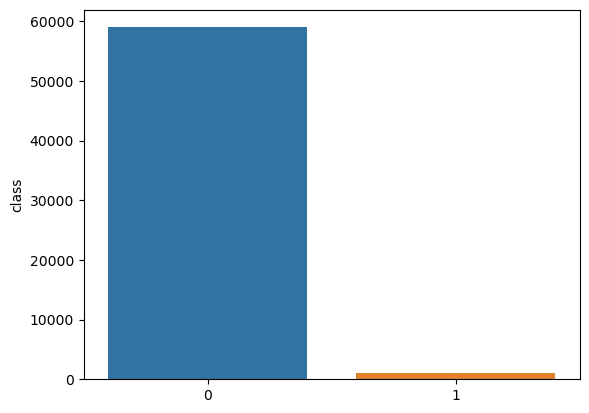

In [20]:
sns.barplot(data=data, x=data['class'].unique(), y=data['class'].value_counts())
plt.show()

In [21]:
data.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

~Identifying the columns whit more than 50% of missing values.

In [22]:
drop_cols=[]

for i in data.columns: 
    null_percentage = data[i].isnull().sum()/len(data)*100 
    if null_percentage>50:
        print(i) 
        drop_cols.append(str(i))

ab_000
bm_000
bn_000
bo_000
bp_000
bq_000
br_000
cr_000


In [23]:
data.shape

(60000, 171)

In [24]:
print(type(drop_cols))

<class 'list'>


In [25]:
missing_vals={}

for i in data.columns: 
    null_percentage = data[i].isnull().sum()/len(data)*100 
    if null_percentage>50:
        missing_vals[i]=null_percentage
missing_vals=sorted(missing_vals.items(), key=lambda x: x[1], reverse=True)

In [26]:
selected_columns = data.columns[data.apply(lambda x:
x.astype(str).str.contains('na')).any()]
print(selected_columns)

Index(['ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001',
       'ag_002', 'ag_003', 'ag_004',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=169)


Generating a list with all columns that have more than 100 Na values.

In [27]:
print("missing values in each column:")
for column in data.columns:
	nan_count = data[column].isna().sum()
	if nan_count>100:
		print(f"{column}:{nan_count} na values")

missing values in each column:
ab_000:46329 na values
ac_000:3335 na values
ad_000:14861 na values
ae_000:2500 na values
af_000:2500 na values
ag_000:671 na values
ag_001:671 na values
ag_002:671 na values
ag_003:671 na values
ag_004:671 na values
ag_005:671 na values
ag_006:671 na values
ag_007:671 na values
ag_008:671 na values
ag_009:671 na values
ah_000:645 na values
ai_000:629 na values
aj_000:629 na values
ak_000:4400 na values
al_000:642 na values
am_0:629 na values
an_000:642 na values
ao_000:589 na values
ap_000:642 na values
aq_000:589 na values
ar_000:2723 na values
as_000:629 na values
at_000:629 na values
au_000:629 na values
av_000:2500 na values
ax_000:2501 na values
ay_000:671 na values
ay_001:671 na values
ay_002:671 na values
ay_003:671 na values
ay_004:671 na values
ay_005:671 na values
ay_006:671 na values
ay_007:671 na values
ay_008:671 na values
ay_009:671 na values
az_000:671 na values
az_001:671 na values
az_002:671 na values
az_003:671 na values
az_004:671 na v

Plotting a bar chart counting the number of 'na' in each column.

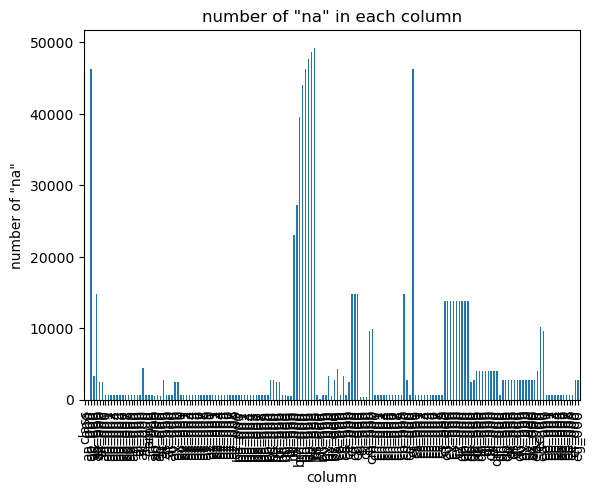

In [28]:
na_count = data.apply(lambda x: x.astype(str).str.count('na')).sum()



na_count.plot(kind='bar')
plt.xlabel('column')
plt.ylabel('number of "na"')
plt.title('number of "na" in each column')
plt.show()

In [29]:

limit_na = len(data) * 0.5




In [30]:
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [31]:
data.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

Calculating the percentage of missing values in each column.

In [32]:

na_percentage=(data.isna().sum()/len(data))*100


selecting columns with more than 50% 'na'

In [33]:

columns_with_highest_na= na_percentage[na_percentage>50].index.tolist()

Displaying the columns that meet the criteria

In [34]:

print("columns with more than 50% of 'na':")
print(columns_with_highest_na)

columns with more than 50% of 'na':
['ab_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'cr_000']


Defining the limit of 50% of missing values

In [35]:

limit_na= len(data)*0.5

Selecting columns that don't meet the criterion

In [36]:

columns_to_drop= data.columns[data.isnull().sum()>limit_na]

Excluding the columns

In [37]:

data=data.drop(columns_to_drop, axis=1)
print(data)

      class  aa_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0         0   76698  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1         0   33058  0.000000e+00     NaN     0.0     0.0     0.0     0.0   
2         0   41040  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3         0      12  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4         0   60874  1.368000e+03   458.0     0.0     0.0     0.0     0.0   
...     ...     ...           ...     ...     ...     ...     ...     ...   
59995     0  153002  6.640000e+02   186.0     0.0     0.0     0.0     0.0   
59996     0    2286  2.130707e+09   224.0     0.0     0.0     0.0     0.0   
59997     0     112  2.130706e+09    18.0     0.0     0.0     0.0     0.0   
59998     0   80292  2.130706e+09   494.0     0.0     0.0     0.0     0.0   
59999     0   40222  6.980000e+02   628.0     0.0     0.0     0.0     0.0   

       ag_002  ag_003  ...     ee_002    ee_003     ee_004     ee_005  \
0 

## Ploting a bar chart with missing values

In [38]:

limit_na=50
columns_with_highest_na= na_percentage[na_percentage> limit_na]

Creating a bar chart of columns, with more than 50% missing values

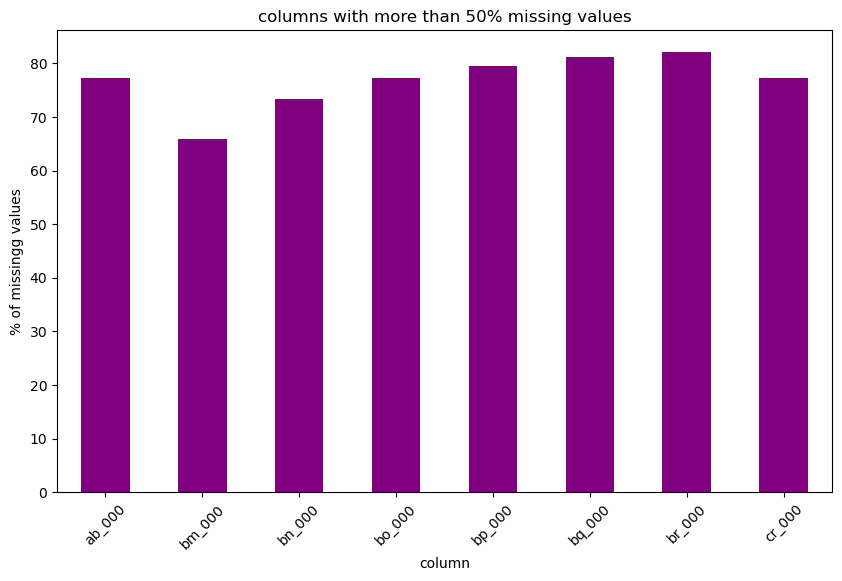

In [39]:
plt.figure(figsize=(10, 6))
columns_with_highest_na.plot(kind='bar', color='purple')
plt.title('columns with more than 50% missing values')
plt.xlabel('column')
plt.ylabel('% of missingg values')
plt.xticks(rotation=45)
plt.show()

In [40]:
data.shape

(60000, 163)

In [41]:
data.describe()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,4.370966e+05,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,2.374282e+06,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.080000e+02,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.672000e+03,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.952200e+04,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,2.288306e+08,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [42]:
print(data)

      class  aa_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0         0   76698  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1         0   33058  0.000000e+00     NaN     0.0     0.0     0.0     0.0   
2         0   41040  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3         0      12  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4         0   60874  1.368000e+03   458.0     0.0     0.0     0.0     0.0   
...     ...     ...           ...     ...     ...     ...     ...     ...   
59995     0  153002  6.640000e+02   186.0     0.0     0.0     0.0     0.0   
59996     0    2286  2.130707e+09   224.0     0.0     0.0     0.0     0.0   
59997     0     112  2.130706e+09    18.0     0.0     0.0     0.0     0.0   
59998     0   80292  2.130706e+09   494.0     0.0     0.0     0.0     0.0   
59999     0   40222  6.980000e+02   628.0     0.0     0.0     0.0     0.0   

       ag_002  ag_003  ...     ee_002    ee_003     ee_004     ee_005  \
0 

In [43]:
data.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


Replacing the numbers of remaining 'na' for '0' at the dataset

In [44]:
data=data.fillna(0)

In [45]:
data.isnull().sum()

class     0
aa_000    0
ac_000    0
ad_000    0
ae_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 163, dtype: int64

### Implementing the PCA Method



From the graph and the list it is possible to see that with only three components a variance of 99.51 % of the data of this data set is obtained, so these three components will be used in the rest of this notebook.

[0.97449962 0.98922642 0.99517721 0.99826172 0.99947749 0.99965385
 0.99976887 0.99981502 0.99984637 0.99987268 0.99989278 0.99990874
 0.99992321 0.99993559 0.99994435 0.99995184 0.99995697 0.99996132
 0.99996537 0.99996818 0.99997088 0.99997313 0.99997514 0.99997709
 0.99997891 0.99998066 0.99998219 0.99998366 0.99998497 0.99998613
 0.99998716 0.9999881  0.99998898 0.99998984 0.99999061 0.99999123
 0.99999182 0.99999238 0.99999289 0.99999337 0.99999384 0.99999427
 0.99999469 0.99999508 0.99999547 0.99999581 0.99999612 0.99999644
 0.99999671 0.99999697 0.9999972  0.99999742 0.99999762 0.99999781
 0.99999798 0.99999815 0.9999983  0.99999844 0.99999857 0.9999987
 0.99999881 0.99999891 0.999999   0.99999908 0.99999915 0.99999922
 0.99999928 0.99999935 0.99999941 0.99999947 0.99999951 0.99999956
 0.99999959 0.99999963 0.99999965 0.99999968 0.9999997  0.99999973
 0.99999975 0.99999977 0.99999979 0.9999998  0.99999982 0.99999984
 0.99999985 0.99999987 0.99999988 0.9999999  0.99999991 0.99999

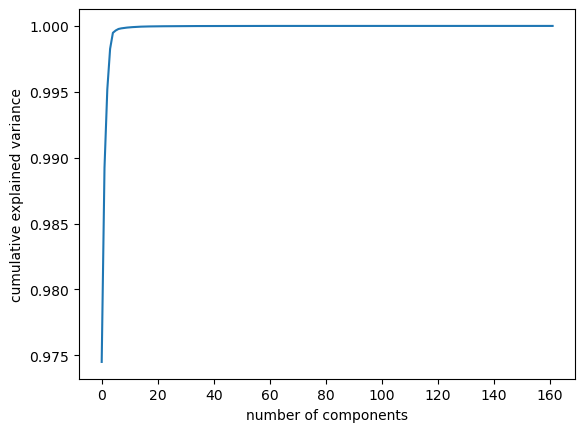

In [46]:
data_no_data =data.drop('class', axis=1)
pca = PCA().fit(data_no_data) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
print(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

In [47]:
data.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


Projecting the data into the 3 main components.

In [48]:
from sklearn.decomposition import PCA
pca=PCA(3)
projected= pca.fit_transform(data)

In [49]:
projected.shape

(60000, 3)

Creating a new pandas Data Frame called data_pca, with the data projected into the 3 main components.

In [50]:
data_pca = pd.DataFrame(projected, columns =['PC1', 'PC2', 'PC3',])

In [51]:
data_pca.head()

,PC1,PC2,PC3
0,1.794496e+09,3.210789e+05,-13906.460177
1,-3.361937e+08,-5.375763e+06,-284089.164922
2,-3.361927e+08,-5.608171e+06,-277158.322752
3,-3.361710e+08,-6.251957e+06,-263693.913744
4,-3.362445e+08,-4.891069e+06,-310276.708894


Adding the 'class' column back to the data frame data_pca

In [52]:
data_pca["class"] = data["class"]

In [53]:
data_pca.head()

,PC1,PC2,PC3,class
0,1.794496e+09,3.210789e+05,-13906.460177,0
1,-3.361937e+08,-5.375763e+06,-284089.164922,0
2,-3.361927e+08,-5.608171e+06,-277158.322752,0
3,-3.361710e+08,-6.251957e+06,-263693.913744,0
4,-3.362445e+08,-4.891069e+06,-310276.708894,0


Converting the Data Frame to a Numpy Array

In [54]:
data_array = data_pca.values

Breaking down the data into training and validation sets.

In [55]:
from sklearn.model_selection import train_test_split
X = data_array[:,0:3]
y = data_array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

Importing libraries and modules from Sklearn to perform the analyses.

In [56]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

Creating a list that contains multiple classification models.

In [57]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))


Performing a cross-validation to evaluate the performance of various machine learning models

In [58]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.254937 (0.242709)
LDA: 0.981604 (0.003221)
KNN: 0.982750 (0.001715)
CART: 0.980625 (0.001350)
NB: 0.255604 (0.240822)


Using Matplotlib to Create a Comparison Chart of the Algorithms

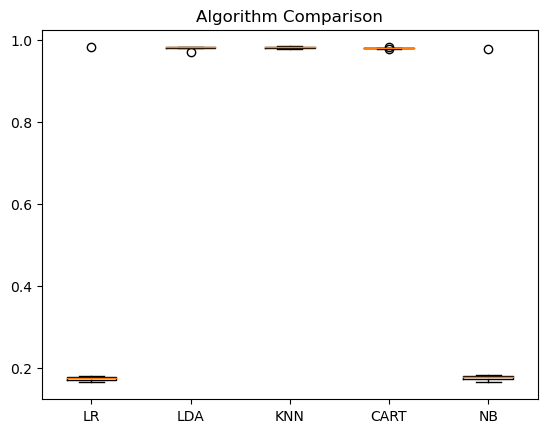

In [59]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

## Results: Accuracy

In [60]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [61]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.9814166666666667
[[11699   110]
 [  113    78]]


### Evaluating the performance of machine learning models without PCA.

In [62]:
data_array = data.values

In [63]:
from sklearn.model_selection import train_test_split
X = data_array[:,1:]
y = data_array[:,0]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [64]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [65]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))


In [66]:
data.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [67]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.986021 (0.002916)
LDA: 0.990208 (0.001211)
KNN: 0.987333 (0.001287)
CART: 0.988771 (0.000675)
NB: 0.967854 (0.002634)


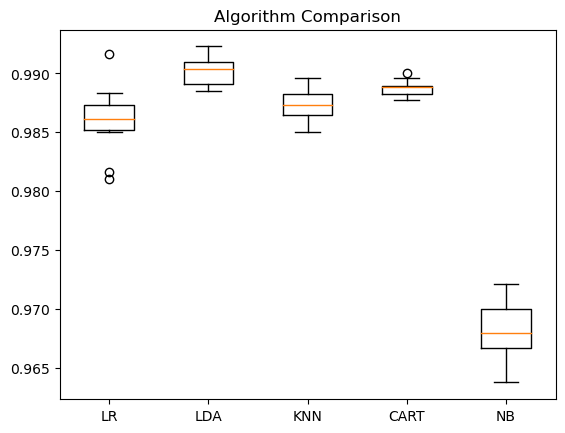

In [68]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [70]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [71]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.99125
[[11762    47]
 [   58   133]]


### "Curse of Dimensionality"

The problem of the curse of Dimensionality is a problem that happens frequently and becomes a challenge for data analysts or professionals who work with data manipulation, because a large number of dimensions in a dataset makes this work difficult even for machines, as it requires greater processing power, the larger the data set, the greater the data set. The greater the number of characteristics or variables, this ends up directly affecting the analyst's work because it makes it difficult to interpret the data and identify the relevant patterns for a good analysis and accuracy. That is why the PCA method is so important, as it helps to reduce dimensionality and preserves as much relevant information as possible in the dataset.

## Conclusion

In view of the analysis made above, I was able to reach the following conclusion: after using the PCA method I obtained the following results: after testing some machine learning models I could see that LDA, KNN and CART had an accuracy result of 98%, so a second analysis was done without the use of the PCA method and I obtained practically the same results except for the LR model which had an accuracy of 25% with PCA and 98% without the use of it. Based on the results, I was then able to conclude the efficacy of the PCA method, because although I reduced a dataset of 162 dimensions to only 3, the method proved to be quite effective.